In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder, scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from ucimlrepo import fetch_ucirepo 

"""
This file performs ridge and lasso regression on car data. The objective is to determine which features are the best predictors or most impactful on a car's gas mileage (mpg). The data set was retrieved from the link below.

Data set link:
    - https://archive.ics.uci.edu/dataset/9/auto+mpg

Source followed for ridge and lasso:
    - https://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html

"""
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# metadata 
# print(auto_mpg.metadata)
# variable information 
# print(auto_mpg.variables) 

# remove missign values from features
X_filtered = X.dropna()
# remove those rows from target data
y_filtered = y.loc[X_filtered.index]

# make origin separate features
# get origin column
origin_col = X_filtered[["origin"]]
enc = OneHotEncoder(sparse_output=False)
# encode the values
origin_cols = enc.fit_transform(origin_col)
# get the column titles
new_cols = enc.get_feature_names_out(["origin"])
# make new dataframe
orig_frame = pd.DataFrame(origin_cols, columns=new_cols, index=X_filtered.index)
# drop original origin column and concatenate the 3 new
X_filtered = pd.concat([X_filtered.drop('origin', axis=1), orig_frame], axis=1)

# scale features data
scaler = StandardScaler()
scaler.fit(X_filtered)
scaler.transform(X_filtered)

array([[ 1.07728956,  1.48394702,  0.66413273, ...,  0.77459667,
        -0.45812285, -0.50239045],
       [ 1.48873169,  1.48394702,  1.57459447, ...,  0.77459667,
        -0.45812285, -0.50239045],
       [ 1.1825422 ,  1.48394702,  1.18439658, ...,  0.77459667,
        -0.45812285, -0.50239045],
       ...,
       [-0.56847897, -0.86401356, -0.53247413, ...,  0.77459667,
        -0.45812285, -0.50239045],
       [-0.7120053 , -0.86401356, -0.66254009, ...,  0.77459667,
        -0.45812285, -0.50239045],
       [-0.72157372, -0.86401356, -0.58450051, ...,  0.77459667,
        -0.45812285, -0.50239045]])

[5.00000000e+09 3.78231664e+09 2.86118383e+09 2.16438064e+09
 1.63727458e+09 1.23853818e+09 9.36908711e+08 7.08737081e+08
 5.36133611e+08 4.05565415e+08 3.06795364e+08 2.32079442e+08
 1.75559587e+08 1.32804389e+08 1.00461650e+08 7.59955541e+07
 5.74878498e+07 4.34874501e+07 3.28966612e+07 2.48851178e+07
 1.88246790e+07 1.42401793e+07 1.07721735e+07 8.14875417e+06
 6.16423370e+06 4.66301673e+06 3.52740116e+06 2.66834962e+06
 2.01850863e+06 1.52692775e+06 1.15506485e+06 8.73764200e+05
 6.60970574e+05 5.00000000e+05 3.78231664e+05 2.86118383e+05
 2.16438064e+05 1.63727458e+05 1.23853818e+05 9.36908711e+04
 7.08737081e+04 5.36133611e+04 4.05565415e+04 3.06795364e+04
 2.32079442e+04 1.75559587e+04 1.32804389e+04 1.00461650e+04
 7.59955541e+03 5.74878498e+03 4.34874501e+03 3.28966612e+03
 2.48851178e+03 1.88246790e+03 1.42401793e+03 1.07721735e+03
 8.14875417e+02 6.16423370e+02 4.66301673e+02 3.52740116e+02
 2.66834962e+02 2.01850863e+02 1.52692775e+02 1.15506485e+02
 8.73764200e+01 6.609705

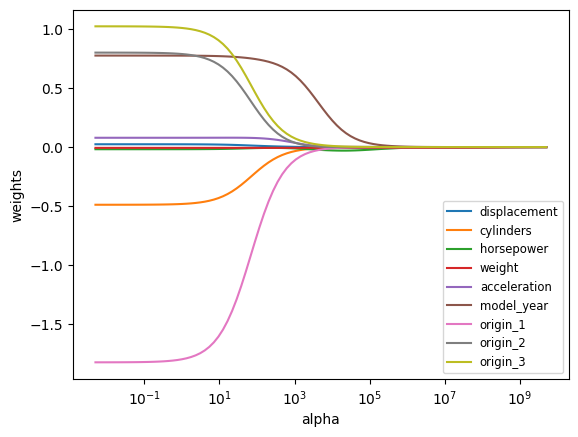

In [2]:
# ridge regression
alphas = 10**np.linspace(10,-2,100)*0.5
print(alphas)

ridge = Ridge()
coefs = []

# go through each alpha and compute ridge coefficients
for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_filtered, y_filtered)
    coefs.append(ridge.coef_)
    
print(np.shape(coefs))
# to array
coefs = np.array(coefs)

# get current axes
ax = plt.gca()
# get feature names to label plot lines
feature_names = X_filtered.columns.tolist()
print(feature_names)

# plot lines
for j, name in enumerate(feature_names):
    ax.plot(alphas, coefs[:, j], label=name)

ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
ax.legend(loc='best', fontsize='small')

In [3]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=1)

# scale data set
scaler_split = StandardScaler()
scaler_split.fit(X_train)
scaler_split.transform(X_train)
scaler_split.fit(X_test)
scaler_split.transform(X_test)

array([[-0.85328193, -1.03065464, -0.33843638, -0.63158896, -0.14129336,
        -1.12585373, -1.42774701, -0.40219983,  2.06559112],
       [-1.06245804, -1.03065464, -0.88713268, -1.02595951,  0.3953497 ,
        -0.31728605, -1.42774701, -0.40219983,  2.06559112],
       [-0.96241729, -1.03065464, -0.88713268, -0.81523614,  0.68155934,
         1.2998493 , -1.42774701, -0.40219983,  2.06559112],
       [-0.84418732, -1.03065464,  0.03567473, -0.20543331,  0.21646868,
        -0.85633117, -1.42774701,  2.48632624, -0.48412292],
       [-1.11702571, -1.03065464, -1.0866586 , -1.23315121,  0.46690211,
         1.56937186, -1.42774701, -0.40219983,  2.06559112],
       [-1.05336342, -1.03065464, -0.68760675, -1.13897316,  0.3595735 ,
         0.22175907,  0.7004042 , -0.40219983, -0.48412292],
       [-1.07155265, -1.03065464, -1.03677712, -1.00476945,  1.11087379,
        -1.12585373, -1.42774701,  2.48632624, -0.48412292],
       [ 0.94745147,  1.32939512,  0.98342288,  1.40618846, -0

In [ ]:
ridge2 = Ridge(alpha = 4)
ridge2.fit(X_train, y_train)
       
pred2 = ridge2.predict(X_test)           
print(pd.Series(ridge2.coef_, index = X_filtered.columns)) # Print coefficients
print(mean_squared_error(y_test, pred2))          # Calculate the test MSE

displacement    0.021035
cylinders      -0.145258
horsepower     -0.005630
weight         -0.007393
acceleration    0.191566
model_year      0.765736
origin_1       -1.649236
origin_2        0.748315
origin_3        0.900921
dtype: float64
11.90635555103398


In [ ]:
ridge3 = Ridge(alpha = 10**10)
ridge3.fit(X_train, y_train)             
pred3 = ridge3.predict(X_test)           
print(pd.Series(ridge3.coef_, index = X_filtered.columns)) # Print coefficients
print(mean_squared_error(y_test, pred3))          # Calculate the test MSE

displacement   -1.936720e-05
cylinders      -3.063438e-07
horsepower     -6.937278e-06
weight         -1.644840e-04
acceleration    2.782591e-07
model_year      4.835007e-07
origin_1       -6.392275e-08
origin_2        2.131941e-08
origin_3        4.260334e-08
dtype: float64
67.3762166009476


In [ ]:
ridge4 = Ridge(alpha = 0)
ridge4.fit(X_train, y_train)           
pred = ridge4.predict(X_test)          
print(pd.Series(ridge4.coef_, index = X_filtered.columns)) # Print coefficients
print(mean_squared_error(y_test, pred))           # Calculate the test MSE

displacement     0.022257
cylinders       -0.166191
horsepower      -0.006383
weight          -0.007402
acceleration     0.193960
model_year       0.768007
origin_1       -10.722795
origin_2        -8.159086
origin_3        -8.000000
dtype: float64
11.882268558597184


/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=1.82112e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [7]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train, y_train)
print("Alpha for smallest CV error is: ", ridgecv.alpha_)

ridge5 = Ridge(alpha = ridgecv.alpha_)
ridge5.fit(X_train, y_train)
print(mean_squared_error(y_test, ridge5.predict(X_test)))

ridge5.fit(X_filtered, y_filtered)
pd.Series(ridge5.coef_, index = X_filtered.columns)

Alpha for smallest CV error is:  9.369087114301934
11.9403755755693


displacement    0.021443
cylinders      -0.433206
horsepower     -0.016072
weight         -0.006722
acceleration    0.079516
model_year      0.772415
origin_1       -1.609626
origin_2        0.701997
origin_3        0.907629
dtype: float64

(100, 9)


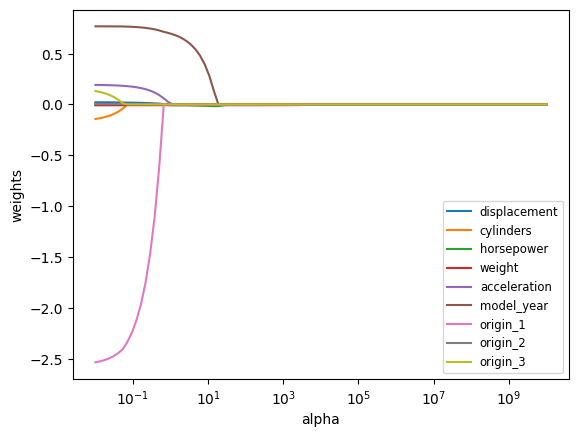

In [ ]:
# Starting Lasso Regression
lasso = Lasso(max_iter = 10000)
coefs = []

# go through alpha values
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit((X_train), y_train)
    coefs.append(lasso.coef_)

print(np.shape(coefs))
coefs = np.array(coefs)

ax = plt.gca()

# for plot lines
for j, name in enumerate(feature_names):
    ax.plot(alphas*2, coefs[:, j], label=name)

ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
ax.legend(loc='best', fontsize='small')

In [9]:
# lasso cv
y_train = y_train.squeeze()
y_test  = y_test.squeeze()

lassocv = LassoCV(alphas = 100, cv = 10, max_iter = 100000)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
print(mean_squared_error(y_test, lasso.predict(X_test)))

# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X_filtered.columns)

15.432019066389046


displacement   -0.003089
cylinders      -0.000000
horsepower     -0.014518
weight         -0.006232
acceleration    0.000000
model_year      0.279942
origin_1       -0.000000
origin_2        0.000000
origin_3        0.000000
dtype: float64